<a href="https://colab.research.google.com/github/ansehoon1999/MG-DataAnaylsis/blob/main/%EC%84%B8%ED%9B%88/DataAnaylsis_7_24_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 노년층 관광 데이터 조사

In [1]:
from google.colab import drive 

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
filename_2020 = '/content/gdrive/MyDrive/2020_travel_ok.csv'
filename_2019 =  '/content/gdrive/MyDrive/2019_travel_ok.csv'

In [3]:
import pandas as pd
import numpy as np

data_2020 = pd.read_csv(filename_2020)
df_2020 = pd.DataFrame(data_2020)
df_2020.head()

print('2020년 데이터 개수: ', len(data_2020))


data_2019 = pd.read_csv(filename_2019)
df_2019 = pd.DataFrame(data_2019)
df_2019.head()

print('2019년 데이터 개수: ', len(data_2019)) 




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,213,316,419,1152,2047) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2020년 데이터 개수:  15592


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,127,199,211,283,295,367,451,535,619,1013) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2019년 데이터 개수:  48269


1, 2 월달 편입 -> 코로나 전/후로 나누기

In [4]:

df_mon_1 = df_2020.groupby('BMON').get_group(1)
df_mon_2 = df_2020.groupby('BMON').get_group(2)

#코로나 이전 데이터셋
df_before = pd.concat([df_2019, df_mon_1, df_mon_2])

print(len(df_before))

50940


In [5]:
#코로나 이후 데이터셋
idx = df_2020[df_2020['BMON'] <= 2].index

df_after = df_2020.drop(idx)
print(len(idx))

print(len(df_after))


2671
12921


- 코로나 전 데이터셋: 50940
- 코로나 후 데이터셋: 12921

#폰트 설치

In [6]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [7]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [8]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 코로나 이전 성별

BSEX                    1
ID      11010580161_58983
Name: 9, dtype: object
MALE:  6506
FEMALE:  6415
TOTAL:  12921


<BarContainer object of 2 artists>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend

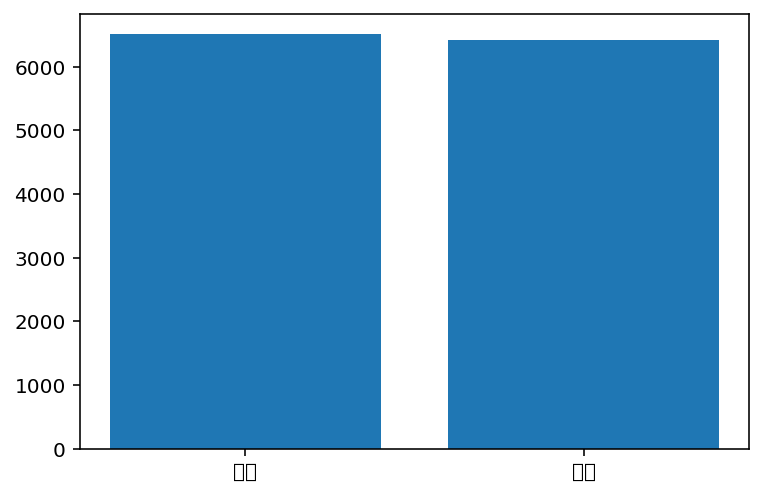

In [9]:
import matplotlib as mpl
import matplotlib.pylab as plt

df_sex = df_after[['BSEX', 'ID']]
print(df_sex.iloc[0, :])

m_count = 0
f_count = 0

for i in range(len(df_sex)) :
  if df_sex.iloc[i,0] == 1 :
    m_count = m_count + 1
  elif df_sex.iloc[i, 0] == 2:
    f_count = f_count + 1


print("MALE: ", m_count)
print("FEMALE: ",f_count)  
total = m_count + f_count
print("TOTAL: ", total)  

plt.bar(["남자", "여자"], [m_count, f_count])


# 코로나 이전 여가 활동

1. 자연 및 풍경감상
2. 음식관광(지역 맛집 등)
3. 야외위락 및 스포츠, 레포츠
활동
4. 역사유적지방문
5. 테마파크, 놀이시설,
동/식물원방문
6. 휴식/휴양
7. 온천/스파
8. 쇼핑
9. 지역 문화예술/공연/
전시시설 관람
10. 스포츠 경기관람
11. 지역 축제/이벤트 참가
12. 교육/체험프로그램 참가
13. 종교/성지순례
14. 카지노, 경마, 경륜 등
15. 시티투어
16. 드라마 촬영지 방문
17. 유흥/오락
18. 가족/친지/친구 방문
19. 회의참가/시찰

In [11]:
df_act =  df_after[['ID', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', "A5_13", 'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19', 'A5_20']]
print(df_act)

                       ID    A5_1    A5_2  ...   A5_18   A5_19   A5_20
9       11010580161_58983       1       2  ...  #NULL!  #NULL!  #NULL!
10      11010580161_58987       1       2  ...  #NULL!  #NULL!  #NULL!
11      11010580161_58998  #NULL!       2  ...      18  #NULL!  #NULL!
12      11010630161_85970       1       2  ...  #NULL!  #NULL!  #NULL!
13      11010630161_85977       1       2  ...  #NULL!  #NULL!  #NULL!
...                   ...     ...     ...  ...     ...     ...     ...
15587  3902058033A_288916       1  #NULL!  ...  #NULL!  #NULL!  #NULL!
15588  39020590071_172926       1       2  ...      18      19  #NULL!
15589  39020590321_202105       1       2  ...      18  #NULL!  #NULL!
15590  39020590321_202605  #NULL!  #NULL!  ...      18  #NULL!  #NULL!
15591  3902059058A_344813       1       2  ...  #NULL!  #NULL!  #NULL!

[12921 rows x 21 columns]


In [13]:
act_newlist =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
count = 0

for i in range(len(df_after)) :
  if df_act.iloc[i, 1] == 1 or df_act.iloc[i, 1] == '1' :
    act_newlist[0] = act_newlist[0] + 1

  if df_act.iloc[i, 2] == 2 or df_act.iloc[i, 2] == '2' :
    act_newlist[1] = act_newlist[1] + 1

  if df_act.iloc[i, 3] == 3 or df_act.iloc[i, 3] == '3' :
    act_newlist[2] = act_newlist[2] + 1

  if df_act.iloc[i, 4] == 4 or df_act.iloc[i, 4] == '4' :
    act_newlist[3] = act_newlist[3] + 1

  if df_act.iloc[i, 5] == 5  or df_act.iloc[i,5] == '5' :
    act_newlist[4] = act_newlist[4] + 1

  if df_act.iloc[i, 6] == 6  or df_act.iloc[i,6] == '6' :
    act_newlist[5] = act_newlist[5] + 1

  if df_act.iloc[i, 7] == 7  or df_act.iloc[i,7] == '7' :
    act_newlist[6] = act_newlist[6] + 1

  if df_act.iloc[i, 8] == 8 or df_act.iloc[i, 8] == '8' :
    act_newlist[7] = act_newlist[7] + 1

  if df_act.iloc[i, 9] == 9 or df_act.iloc[i, 9] == '9' :
    act_newlist[8] = act_newlist[8] + 1

  if df_act.iloc[i, 10] == 10 or df_act.iloc[i, 10] == '10' :
    act_newlist[9] = act_newlist[9] + 1

  if df_act.iloc[i, 11] == 11 or df_act.iloc[i, 11] == '11' :
    act_newlist[10] = act_newlist[10] + 1

  if df_act.iloc[i, 12] == 12 or df_act.iloc[i, 12] == '12' :
    act_newlist[11] = act_newlist[11] + 1

  if df_act.iloc[i, 13] == 13 or df_act.iloc[i, 13] == '13' :
    act_newlist[12] = act_newlist[12] + 1

  if df_act.iloc[i, 14] == 14 or df_act.iloc[i, 14] == '14' :
    act_newlist[13] = act_newlist[13] + 1

  if df_act.iloc[i, 15] == 15 or df_act.iloc[i, 15] == '15' :
    act_newlist[14] = act_newlist[14] + 1

  if df_act.iloc[i, 16] == 16  or df_act.iloc[i, 16] == '16' :
    act_newlist[15] = act_newlist[15] + 1

  if df_act.iloc[i, 17] == 17 or df_act.iloc[i, 17] == '17' :
    act_newlist[16] = act_newlist[16] + 1

  if df_act.iloc[i, 18] == 18 or df_act.iloc[i, 18] == '18' :
    act_newlist[17] = act_newlist[17] + 1

  if df_act.iloc[i, 19] == 19 or df_act.iloc[i, 19] == '19' :
    act_newlist[18] = act_newlist[18] + 1

print(act_newlist)


[10309, 7158, 757, 1177, 733, 7745, 251, 1110, 425, 10, 176, 181, 328, 13, 794, 562, 332, 2171, 193]


In [14]:
a = [0] * 19
for i in range(len(act_newlist)) :
  a[i] = (act_newlist[i]/sum(act_newlist)) * 100
print(a)

[29.94625998547567, 20.793028322440087, 2.1989832970225125, 3.419026870007262, 2.129266521423384, 22.498184458968773, 0.729121278140886, 3.224400871459695, 1.2345679012345678, 0.029048656499636893, 0.5112563543936093, 0.5257806826434277, 0.95279593318809, 0.03776325344952796, 2.306463326071169, 1.6325344952795935, 0.9644153957879449, 6.30646332607117, 0.560639070442992]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_

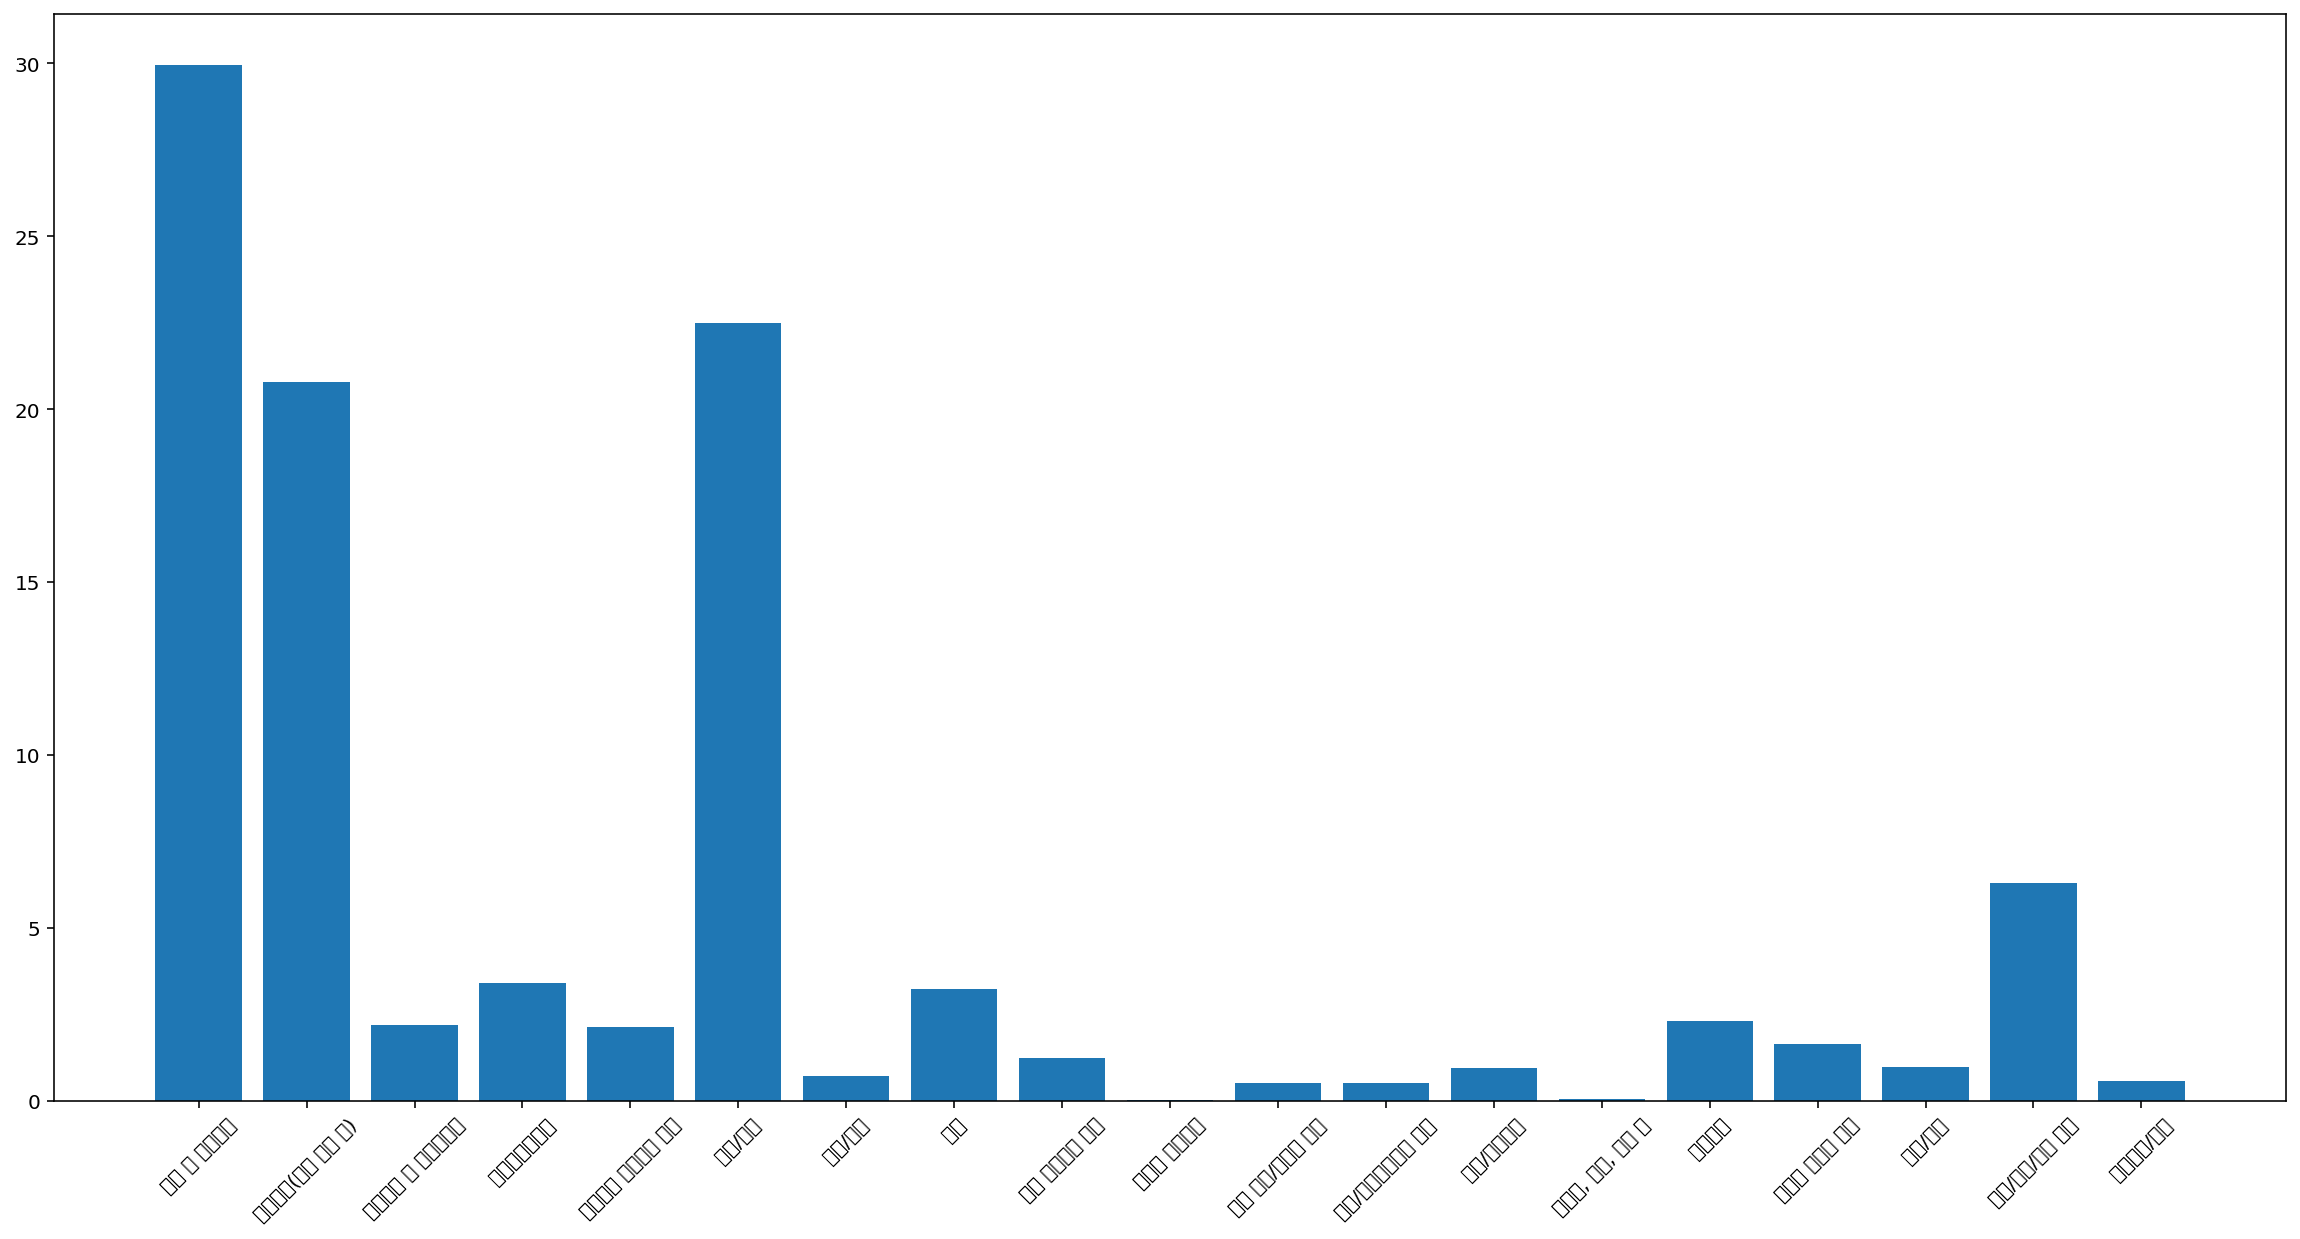

In [15]:
import seaborn as sns

column_list = ['자연 및 풍경감상', '음식관광(지역 맛집 등)', '야외위락 및 스포츠활동', '역사유적지방문', '테마파크 놀이시설 방문', '휴식/휴양', '온천/스파', '쇼핑', '지역 문화예술 관람', '스포츠 경기관람', '지역 축제/이벤트 참가', '교육/체험프로그램 참가', '종교/성지순례', '카지노, 경마, 경륜 등', '시티투어', '드라마 촬영지 방문', '유흥/오락', '가족/친지/친구 방문', '회의참가/시찰']
plt.figure(figsize=(20,10))
plt.bar(column_list, a)
plt.xticks(rotation = 45)

#여행지 선택의 이유

In [28]:
df_trans = df_after[['A4_1', 'A4_2', 'A4_3']]


trans1 = [0] * 15
trans2 = [0] * 15
trans3 = [0] * 15

#1순위 선호
for i in range(len(df_trans)) :
  if df_trans.iloc[i, 0] == 1 or df_trans.iloc[i,0] == '1':
    trans1[0] = trans1[0] + 1
  if df_trans.iloc[i, 0] == 2 or df_trans.iloc[i,0] == '2':
    trans1[1] = trans1[1] + 1
  if df_trans.iloc[i, 0] == 3 or df_trans.iloc[i,0] == '3':
    trans1[2] = trans1[2] + 1
  if df_trans.iloc[i, 0] == 4 or df_trans.iloc[i,0] == '4':
    trans1[3] = trans1[3] + 1
  if df_trans.iloc[i, 0] == 5 or df_trans.iloc[i,0] == '5':
    trans1[4] = trans1[4] + 1
  if df_trans.iloc[i, 0] == 6 or df_trans.iloc[i,0] == '6':
    trans1[5] = trans1[5] + 1
  if df_trans.iloc[i, 0] == 7 or df_trans.iloc[i,0] == '7':
    trans1[6] = trans1[6] + 1
  if df_trans.iloc[i, 0] == 8 or df_trans.iloc[i,0] == '8':
    trans1[7] = trans1[7] + 1
  if df_trans.iloc[i, 0] == 9 or df_trans.iloc[i,0] == '9':
    trans1[8] = trans1[8] + 1
  if df_trans.iloc[i, 0] == 10 or df_trans.iloc[i,0] == '10':
    trans1[9] = trans1[9] + 1
  if df_trans.iloc[i, 0] == 11 or df_trans.iloc[i,0] == '11':
    trans1[10] = trans1[10] + 1
  if df_trans.iloc[i, 0] == 12 or df_trans.iloc[i,0] == '12':
    trans1[11] = trans1[11] + 1
  if df_trans.iloc[i, 0] == 13 or df_trans.iloc[i,0] == '13':
    trans1[12] = trans1[12] + 1
  if df_trans.iloc[i, 0] == 14 or df_trans.iloc[i,0] == '14':
    trans1[13] = trans1[13] + 1
  if df_trans.iloc[i, 0] == 15 or df_trans.iloc[i,0] == '15':
    trans1[14] = trans1[14] + 1
#===========================================

#2순위 선호       
for i in range(len(df_trans)) :
  if df_trans.iloc[i, 1] == 1 or df_trans.iloc[i,1] == '1':
    trans2[0] = trans2[0] + 1
  if df_trans.iloc[i, 1] == 2 or df_trans.iloc[i,1] == '2':
    trans2[1] = trans2[1] + 1
  if df_trans.iloc[i, 1] == 3 or df_trans.iloc[i,1] == '3':
    trans2[2] = trans2[2] + 1
  if df_trans.iloc[i, 1] == 4 or df_trans.iloc[i,1] == '4':
    trans2[3] = trans2[3] + 1
  if df_trans.iloc[i, 1] == 5 or df_trans.iloc[i,1] == '5':
    trans2[4] = trans2[4] + 1
  if df_trans.iloc[i, 1] == 6 or df_trans.iloc[i,1] == '6':
    trans2[5] = trans2[5] + 1
  if df_trans.iloc[i, 1] == 7 or df_trans.iloc[i,1] == '7':
    trans2[6] = trans2[6] + 1
  if df_trans.iloc[i, 1] == 8 or df_trans.iloc[i,1] == '8':
    trans2[7] = trans2[7] + 1
  if df_trans.iloc[i, 1] == 9 or df_trans.iloc[i,1] == '9':
    trans2[8] = trans2[8] + 1

  if df_trans.iloc[i, 1] == 10 or df_trans.iloc[i,1] == '10':
    trans2[9] = trans2[9] + 1
  if df_trans.iloc[i, 1] == 11 or df_trans.iloc[i,1] == '11':
    trans2[10] = trans2[10] + 1
  if df_trans.iloc[i, 1] == 12 or df_trans.iloc[i,1] == '12':
    trans2[11] = trans2[11] + 1
  if df_trans.iloc[i, 1] == 13 or df_trans.iloc[i,1] == '13':
    trans2[12] = trans2[12] + 1
  if df_trans.iloc[i, 1] == 14 or df_trans.iloc[i,1] == '14':
    trans2[13] = trans2[13] + 1
  if df_trans.iloc[i, 1] == 15 or df_trans.iloc[i,1] == '15':
    trans2[14] = trans2[14] + 1
#===========================================

#3순위 선호       
for i in range(len(df_trans)) :
  if df_trans.iloc[i, 2] == 1 or df_trans.iloc[i,2] == '1':
    trans3[0] = trans3[0] + 1
  if df_trans.iloc[i, 2] == 2 or df_trans.iloc[i,2] == '2':
    trans3[1] = trans3[1] + 1
  if df_trans.iloc[i, 2] == 3 or df_trans.iloc[i,2] == '3':
    trans3[2] = trans3[2] + 1
  if df_trans.iloc[i, 2] == 4 or df_trans.iloc[i,2] == '4':
    trans3[3] = trans3[3] + 1
  if df_trans.iloc[i, 2] == 5 or df_trans.iloc[i,2] == '5':
    trans3[4] = trans3[4] + 1
  if df_trans.iloc[i, 2] == 6 or df_trans.iloc[i,2] == '6':
    trans3[5] = trans3[5] + 1
  if df_trans.iloc[i, 2] == 7 or df_trans.iloc[i,2] == '7':
    trans3[6] = trans3[6] + 1
  if df_trans.iloc[i, 2] == 8 or df_trans.iloc[i,2] == '8':
    trans3[7] = trans3[7] + 1
  if df_trans.iloc[i, 2] == 9 or df_trans.iloc[i,2] == '9':
    trans3[8] = trans3[8] + 1

  if df_trans.iloc[i, 2] == 10 or df_trans.iloc[i,2] == '10':
    trans3[9] = trans3[9] + 1
  if df_trans.iloc[i, 2] == 11 or df_trans.iloc[i,2] == '11':
    trans3[10] = trans3[10] + 1
  if df_trans.iloc[i, 2] == 12 or df_trans.iloc[i,2] == '12':
    trans3[11] = trans3[11] + 1
  if df_trans.iloc[i, 2] == 13 or df_trans.iloc[i,2] == '13':
    trans3[12] = trans3[12] + 1
  if df_trans.iloc[i, 2] == 14 or df_trans.iloc[i,2] == '14':
    trans3[13] = trans3[13] + 1
  if df_trans.iloc[i, 2] == 15 or df_trans.iloc[i,2] == '15':
    trans3[14] = trans3[14] + 1
#===========================================


print('1순위 선호: ', trans1)
print('2순위 선호: ', trans2)
print('3순위 선호: ', trans3)

1순위 선호:  [2063, 2676, 701, 1581, 1531, 387, 184, 1078, 301, 86, 596, 228, 95, 1227, 187]
2순위 선호:  [1964, 1958, 704, 1396, 1423, 323, 137, 979, 321, 108, 649, 330, 77, 1316, 52]
3순위 선호:  [1245, 1244, 546, 923, 936, 283, 80, 712, 268, 74, 533, 300, 79, 951, 37]


In [29]:
count = []
count_p = []
count_r = []

for i in range(15) :
  count.append(trans1[i]  + trans2[i] + trans3[i]) 
  count_p.append(trans1[i] * 1 + trans2[i] *  0.5 + trans3[i] * 0.3)

for i in range(15) :
  count_r.append(count_p[i]/sum(count_p)  * 100) 



In [30]:
print(count_r)

[16.084939396220733, 18.953737860423097, 5.72536324625461, 12.026180079801248, 11.872788526688248, 2.9803131822630426, 1.3010050440412555, 8.380542799066475, 2.5497816758262437, 0.7631935556726641, 5.0835654596100275, 2.2726417225024464, 0.7396672438455167, 10.211830911691635, 1.05444929609275]


15
15


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48380 missing from current font.
  font.set_

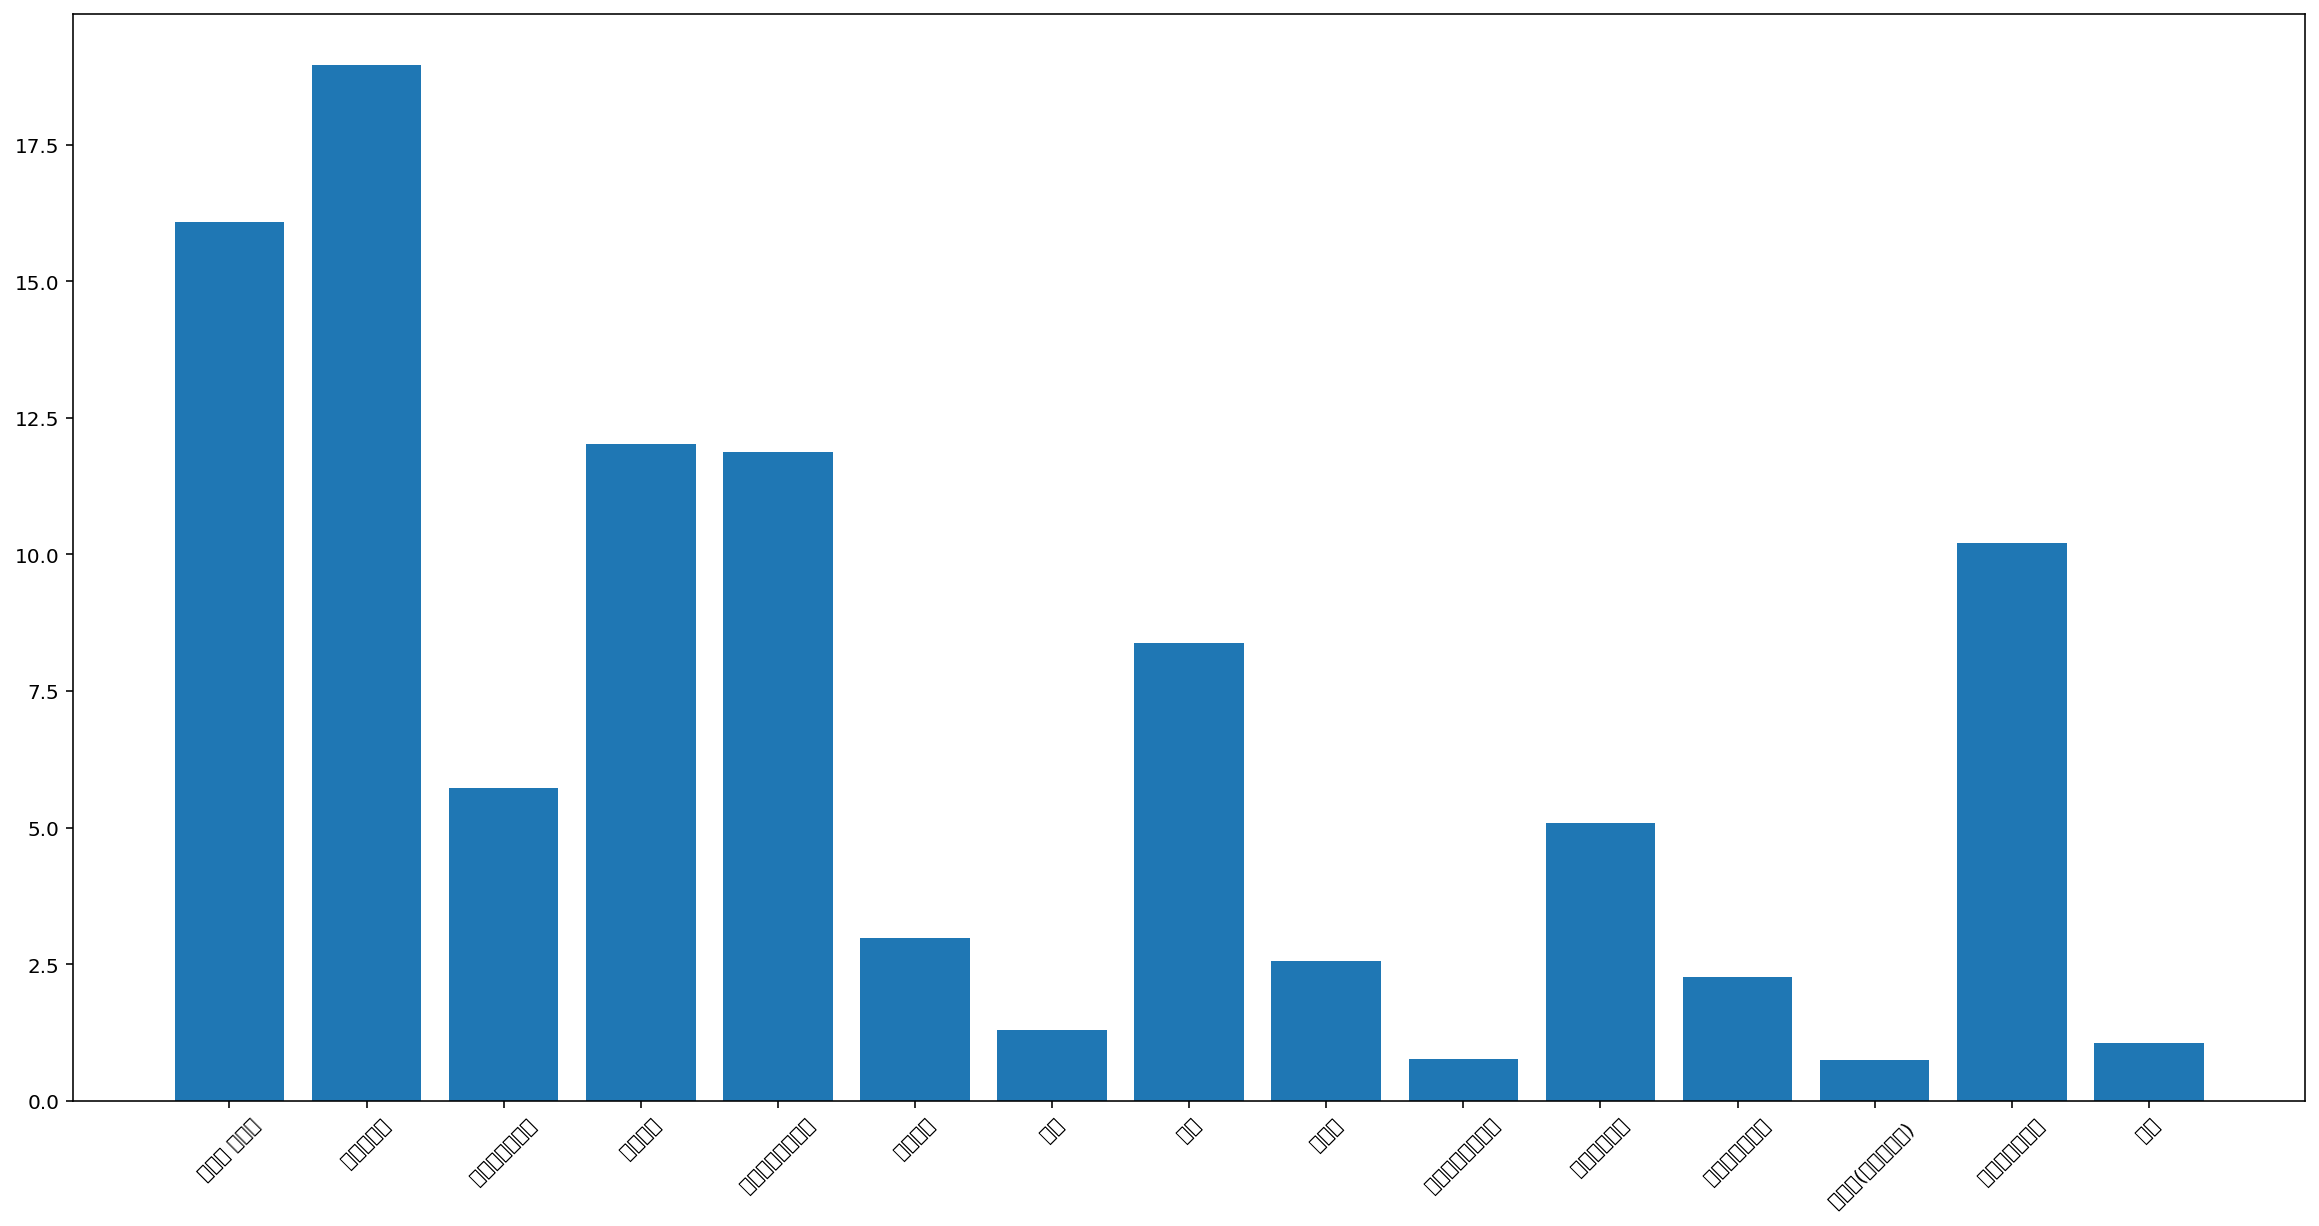

In [31]:
title = ['여행지 지명도', '볼거리제공', '저렴한여행경비', '이동거리', '여행할수있는시간', '숙박시설', '쇼핑', '음식', '교통편', '체험프로그램유무', '경험자의추천', '관광지편의시설', '교육성(교육적측면) ', '여행동반자유형', '기타']

print(len(count_r))
print(len(title))

plt.figure(figsize=(20,10))

plt.bar(title, count_r)
plt.xticks(rotation = 45)


#만족도 조사 (하나)

In [22]:
df_sat = df_before[['A11']]
print(df_sat)

      A11
0       4
1       4
2       4
3       4
4       4
...    ..
15498   5
15499   4
15533   3
15534   4
15548   5

[50940 rows x 1 columns]


In [23]:
sat_list = [0,0,0,0,0]

for i in range(len(df_sat)) :
  if df_sat.iloc[i, 0] == 1 :
    sat_list[0] = sat_list[0] + 1
  elif df_sat.iloc[i, 0] == 2 :
    sat_list[1] = sat_list[1] + 1
  elif df_sat.iloc[i, 0] == 3 :
    sat_list[2] = sat_list[2] + 1
  elif df_sat.iloc[i, 0]== 4 :
    sat_list[3] = sat_list[3] + 1
  elif df_sat.iloc[i, 0] == 5 :
    sat_list[4] = sat_list[4] + 1
print(sat_list)

[0, 1, 137, 1979, 554]


# 재방문의도 및 타인 추천의도

      A12 A13
0       4   4
1       5   4
2       5   4
3       4   4
4       4   4
...    ..  ..
15498   5   5
15499   5   5
15533   3   3
15534   4   3
15548   5   5

[50940 rows x 2 columns]
[[2, 17, 263, 2023, 366], [2, 17, 379, 2039, 234]]
[4.023586671658554, 3.9307375514788467]


<BarContainer object of 2 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

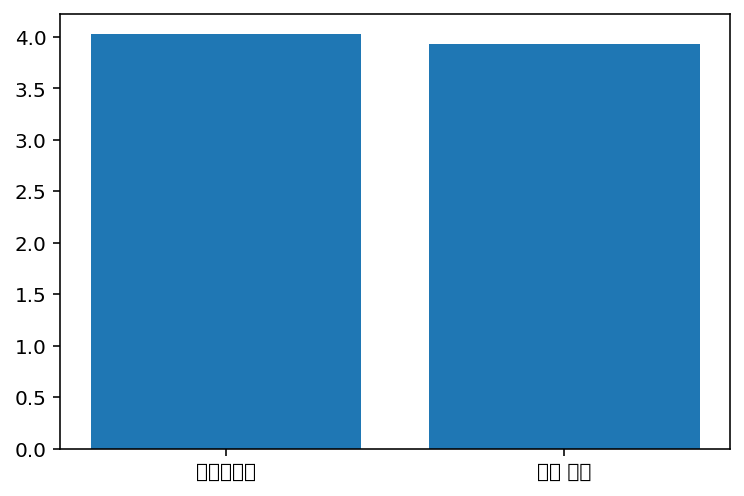

In [25]:
df_sat2 = df_before[['A12', 'A13']]
print(df_sat2)

sat_list2 = [
            [0,0,0,0,0],
            [0,0,0,0,0]
]

for j in range(2) :
  for i in range(len(df_sat2)) :

    if df_sat2.iloc[i, j] == 1 :
      sat_list2[j][0] = sat_list2[j][0] + 1
    elif df_sat2.iloc[i, j] == 2 :
      sat_list2[j][1] = sat_list2[j][1] + 1
    elif df_sat2.iloc[i, j] == 3 :
      sat_list2[j][2] = sat_list2[j][2] + 1
    elif df_sat2.iloc[i, j]== 4 :
      sat_list2[j][3] = sat_list2[j][3] + 1
    elif df_sat2.iloc[i, j] == 5 :
      sat_list2[j][4] = sat_list2[j][4] + 1

print(sat_list2)

total = [0] * 2
title = ['재방문의도', '타인 추천']

for i in range(2) :
  total[i]= (sat_list2[i][0] * 1  +  sat_list2[i][1] * 2  + sat_list2[i][2] * 3  + sat_list2[i][3] * 4  + sat_list2[i][4] * 5 ) / sum(sat_list2[i])

print(total) 
plt.bar(title, total)

1순위 선호:  [4369, 5262, 1383, 2539, 2597, 635, 383, 2037, 840, 239, 1472, 585, 247, 2593, 388]
2순위 선호:  [3763, 3862, 1419, 2405, 2504, 555, 271, 1888, 731, 263, 1518, 785, 218, 2671, 104]
3순위 선호:  [2408, 2461, 1063, 1548, 1731, 457, 169, 1348, 570, 209, 1237, 710, 160, 2006, 74]
[10540, 11585, 3865, 6492, 6832, 1647, 823, 5273, 2141]
[6972.9, 7931.3, 2411.4, 4205.9, 4368.3, 1049.6, 569.2, 3385.4, 1376.5]
[13.688457008244995, 15.569886140557518, 4.733804475853947, 8.256576364350215, 8.575382803297998, 2.0604632901452686, 1.1173930113859443, 6.645857872006282, 2.7021986650961916]


<BarContainer object of 9 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54637 missing from current font.
  font.set_

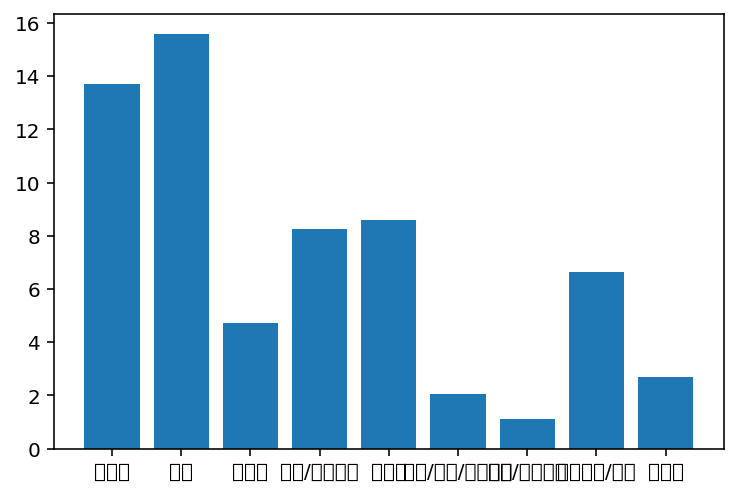

In [26]:
print('1순위 선호: ', trans1)
print('2순위 선호: ', trans2)
print('3순위 선호: ', trans3)

count = []
count_p = []
count_r = []

for i in range(9) :
  count.append(trans1[i]  + trans2[i] + trans3[i]) 
  count_p.append(trans1[i] * 1 + trans2[i] *  0.5 + trans3[i] * 0.3)

for i in range(9) :
  count_r.append(count_p[i]/len(df_trans)  * 100) 

print(count)
print(count_p)
print(count_r)


title = ['자가용', '철도', '항공기', '선박/해상교통', '지하철', '고속/시외/시내버스', '전세/관광버스', '차량대여/렌트', '자전거']
plt.bar(title, count_r)



# 여행 이동 수단

In [27]:
df_trans = df_before[['A1_1', 'A1_2', 'A1_3']]


trans1 = [0] * 9
trans2 = [0] * 9
trans3 = [0] * 9

#1순위 선호
for i in range(len(df_trans)) :
  if df_trans.iloc[i, 0] == 1 or df_trans.iloc[i,0] == '1':
    trans1[0] = trans1[0] + 1
  if df_trans.iloc[i, 0] == 2 or df_trans.iloc[i,0] == '2':
    trans1[1] = trans1[1] + 1
  if df_trans.iloc[i, 0] == 3 or df_trans.iloc[i,0] == '3':
    trans1[2] = trans1[2] + 1
  if df_trans.iloc[i, 0] == 4 or df_trans.iloc[i,0] == '4':
    trans1[3] = trans1[3] + 1
  if df_trans.iloc[i, 0] == 5 or df_trans.iloc[i,0] == '5':
    trans1[4] = trans1[4] + 1
  if df_trans.iloc[i, 0] == 6 or df_trans.iloc[i,0] == '6':
    trans1[5] = trans1[5] + 1
  if df_trans.iloc[i, 0] == 7 or df_trans.iloc[i,0] == '7':
    trans1[6] = trans1[6] + 1
  if df_trans.iloc[i, 0] == 8 or df_trans.iloc[i,0] == '8':
    trans1[7] = trans1[7] + 1
  if df_trans.iloc[i, 0] == 9 or df_trans.iloc[i,0] == '9':
    trans1[8] = trans1[8] + 1
#===========================================

#2순위 선호       
for i in range(len(df_trans)) :
  if df_trans.iloc[i, 1] == 1 or df_trans.iloc[i,1] == '1':
    trans2[0] = trans2[0] + 1
  if df_trans.iloc[i, 1] == 2 or df_trans.iloc[i,1] == '2':
    trans2[1] = trans2[1] + 1
  if df_trans.iloc[i, 1] == 3 or df_trans.iloc[i,1] == '3':
    trans2[2] = trans2[2] + 1
  if df_trans.iloc[i, 1] == 4 or df_trans.iloc[i,1] == '4':
    trans2[3] = trans2[3] + 1
  if df_trans.iloc[i, 1] == 5 or df_trans.iloc[i,1] == '5':
    trans2[4] = trans2[4] + 1
  if df_trans.iloc[i, 1] == 6 or df_trans.iloc[i,1] == '6':
    trans2[5] = trans2[5] + 1
  if df_trans.iloc[i, 1] == 7 or df_trans.iloc[i,1] == '7':
    trans2[6] = trans2[6] + 1
  if df_trans.iloc[i, 1] == 8 or df_trans.iloc[i,1] == '8':
    trans2[7] = trans2[7] + 1
  if df_trans.iloc[i, 1] == 9 or df_trans.iloc[i,1] == '9':
    trans2[8] = trans2[8] + 1
#===========================================

#3순위 선호       
for i in range(len(df_trans)) :
  if df_trans.iloc[i, 2] == 1 or df_trans.iloc[i,2] == '1':
    trans3[0] = trans3[0] + 1
  if df_trans.iloc[i, 2] == 2 or df_trans.iloc[i,2] == '2':
    trans3[1] = trans3[1] + 1
  if df_trans.iloc[i, 2] == 3 or df_trans.iloc[i,2] == '3':
    trans3[2] = trans3[2] + 1
  if df_trans.iloc[i, 2] == 4 or df_trans.iloc[i,2] == '4':
    trans3[3] = trans3[3] + 1
  if df_trans.iloc[i, 2] == 5 or df_trans.iloc[i,2] == '5':
    trans3[4] = trans3[4] + 1
  if df_trans.iloc[i, 2] == 6 or df_trans.iloc[i,2] == '6':
    trans3[5] = trans3[5] + 1
  if df_trans.iloc[i, 2] == 7 or df_trans.iloc[i,2] == '7':
    trans3[6] = trans3[6] + 1
  if df_trans.iloc[i, 2] == 8 or df_trans.iloc[i,2] == '8':
    trans3[7] = trans3[7] + 1
  if df_trans.iloc[i, 2] == 9 or df_trans.iloc[i,2] == '9':
    trans3[8] = trans3[8] + 1
#===========================================


print('1순위 선호: ', trans1)
print('2순위 선호: ', trans2)
print('3순위 선호: ', trans3)

1순위 선호:  [20322, 785, 654, 95, 565, 1481, 1089, 370, 35]
2순위 선호:  [267, 430, 388, 417, 586, 379, 120, 512, 5]
3순위 선호:  [59, 496, 96, 84, 53, 73, 18, 133, 3]


1순위 선호:  [20322, 785, 654, 95, 565, 1481, 1089, 370, 35]
2순위 선호:  [267, 430, 388, 417, 586, 379, 120, 512, 5]
3순위 선호:  [59, 496, 96, 84, 53, 73, 18, 133, 3]
[20648, 1711, 1138, 596, 1204, 1933, 1227, 1015, 43]
[20473.2, 1148.8, 876.8, 328.7, 873.9, 1692.4, 1154.4, 665.9, 38.4]
[40.19081272084806, 2.255202198665096, 1.7212406753042795, 0.6452689438555163, 1.7155477031802118, 3.3223400078523757, 2.2661955241460543, 1.307224185316058, 0.07538280329799764]


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54637 missing from current font.
  font.set_

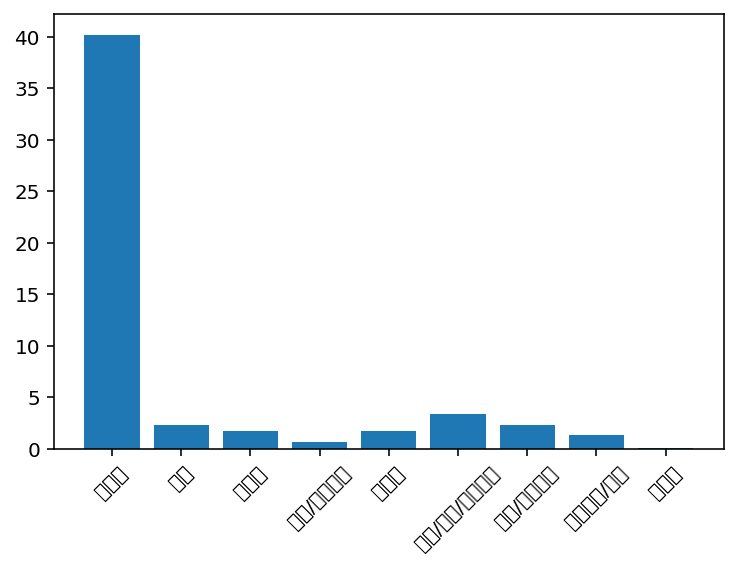

In [ ]:
print('1순위 선호: ', trans1)
print('2순위 선호: ', trans2)
print('3순위 선호: ', trans3)

count = []
count_p = []
count_r = []

for i in range(9) :
  count.append(trans1[i]  + trans2[i] + trans3[i]) 
  count_p.append(trans1[i] * 1 + trans2[i] *  0.5 + trans3[i] * 0.3)

for i in range(9) :
  count_r.append(count_p[i]/len(df_trans)  * 100) 

print(count)
print(count_p)
print(count_r)


title = ['자가용', '철도', '항공기', '선박/해상교통', '지하철', '고속/시외/시내버스', '전세/관광버스', '차량대여/렌트', '자전거']
plt.bar(title, count_r)
plt.xticks(rotation = 45)



가중치 계산 방법: 만약에 여행을 가게 된다면 해당 이동수단을 타고갈 확률

가중치
- 1순위: 1
- 2순위: 0.5
- 3순위: 0.3